This script builds a deep learning model to predict handwritten digits from 'optdigits.tes' images. Each row in the dataset represents an 8x8 reshaped digit image with labels in the last column.


In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing data
X_train = pd.read_csv('optdigits.tra',header=None)
X_test = pd.read_csv('optdigits.tes',header=None)
y_train = X_train[64]
y_test = X_test[64]
X_train = X_train.drop(X_train.columns[64],axis=1)
X_test = X_test.drop(X_test.columns[64],axis=1)

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [5]:
# Build a deep learning model with two hidden layers (24 nodes each
#using ReLU activation, and an output layer with 10 nodes and softmax activation

network1 = keras.Sequential([
    layers.Dense(24, activation='relu'),
    layers.Dense(24, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Using categorical_crossentropy for multi-class classification
network1.compile(optimizer='rmsprop',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

history = network1.fit(X_train, y_train, epochs=1100, batch_size=48,
                       validation_split=0.20, verbose=0)

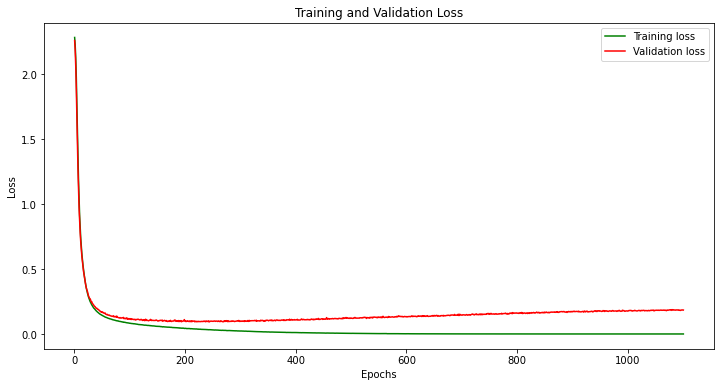

In [6]:
# Plot the training and validation loss curves to identify overfitting epochs.

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [7]:
#Retrain the model with this number of epochs.

dfnew = pd.DataFrame(history.history)
dfnew.index = range(1,len(val_loss)+1)
# dfnew
dfnew[dfnew.val_loss==dfnew.val_loss.min()]
optimal_epochs = dfnew['val_loss'].idxmin()
print("The model starts overfitting at",optimal_epochs,"epochs")

The model starts overfitting at 244 epochs


In [8]:
#Calculating the test accuracy rate.

network2 = keras.Sequential([
    layers.Dense(24, activation='relu'),
    layers.Dense(24, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compiling the model
# Using categorical_crossentropy for multi-class classification
network2.compile(optimizer='rmsprop',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

history = network2.fit(X_train, y_train, epochs=optimal_epochs,
                       batch_size=48,verbose=0)

test_loss, test_accuracy = network2.evaluate(X_test, y_test)

print("Test Accuracy Rate is: ",(test_accuracy)*100)

57/57 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.9494
Test Accuracy Rate is:  94.93600726127625


In [10]:
#Predict the test set
ypred0 = network2.predict(X_test)
ypred0.shape

57/57 [==============================] - 0s 956us/step


(1797, 10)

In [11]:
# One-hot decode the predictions
ypred = np.round(ypred0, decimals=0)
print("Before onehot decoding the predicted digits: ")
print(ypred[:5])
ypred = np.argmax(ypred0, axis=-1)
print("After onehot decoding the predicted digits: ")
print(ypred[:5])

Before onehot decoding the predicted digits: 
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
After onehot decoding the predicted digits: 
[0 1 8 3 4]


In [12]:
# One-hot decode y_test (was encoded in part (a) with to_categorical() )
y_test0 = np.round(y_test, decimals=0)
print("Before onehot decoding the actual test digits digits: ")
print(y_test0[:5])
y_test = np.argmax(y_test0, axis=-1)
print("After onehot decoding the actual test digits digits: ")
print(y_test[:5])

Before onehot decoding the actual test digits digits: 
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
After onehot decoding the actual test digits digits: 
[0 1 2 3 4]


In [13]:
#finding error rates for each digit using a 10 by 10 cross tab 
crosstab_df = pd.crosstab(y_test, ypred, rownames=['true labels'],\
                          colnames=['predictions'])
df2 = crosstab_df.copy()
df2['row sum'] = df2.sum(axis=1).values
df2['error rate'] = 1-np.diag(crosstab_df)/np.sum(crosstab_df,axis=1)
del df2['row sum']
print(df2)
print("\n\nThe Error rates for each digit are:")
df2['error rate']

predictions    0    1    2    3    4    5    6    7    8    9  error rate
true labels                                                              
0            176    0    0    0    0    1    1    0    0    0    0.011236
1              0  174    0    0    0    0    1    0    5    2    0.043956
2              0    0  170    0    1    0    1    0    5    0    0.039548
3              0    0    5  165    0    2    0    0    9    2    0.098361
4              0    1    0    0  176    0    0    0    3    1    0.027624
5              1    1    1    1    0  177    0    0    0    1    0.027473
6              1    1    0    0    1    0  178    0    0    0    0.016575
7              0    0    0    0    2   10    0  163    1    3    0.089385
8              0    4    0    4    2    2    1    0  156    5    0.103448
9              1    1    0    1    0    3    0    0    3  171    0.050000


The Error rates for each digit are:


true labels
0    0.011236
1    0.043956
2    0.039548
3    0.098361
4    0.027624
5    0.027473
6    0.016575
7    0.089385
8    0.103448
9    0.050000
Name: error rate, dtype: float64

In [14]:
# digit with largest error rate
df2[ df2['error rate']==df2['error rate'].max()]

predictions,0,1,2,3,4,5,6,7,8,9,error rate
true labels,,,,,,,,,,,
8,0,4,0,4,2,2,1,0,156,5,0.103448


In [15]:
most_difficult_digit = df2['error rate'].idxmax()
highest_error_rate = df2['error rate'].max()
print("Most Difficult Digit to Predict is", most_difficult_digit,\
      "with an error rate of", highest_error_rate)

Most Difficult Digit to Predict is 8 with an error rate of 0.10344827586206895
